## KNN implementation on Gene Expression Data Set (Generalized) 

## 60% train data , 40% test data

## Library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import math 

## Data Set

In [3]:
df = pd.read_csv('gene_expression.csv')
df

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


In [4]:
df.columns 

Index(['Gene One', 'Gene Two', 'Cancer Present'], dtype='object')

In [5]:
n = len(df.columns)
n

3

In [6]:
df[df.columns[n-1]].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

In [7]:
df[df.columns[n-1]].value_counts().index

Int64Index([1, 0], dtype='int64')

In [8]:
df[df.columns[n-1]].nunique()

2

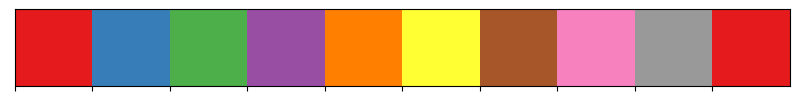

In [9]:
custom_palette = sns.color_palette("Set1",10)
sns.palplot(custom_palette)

https://www.codecademy.com/article/seaborn-design-ii

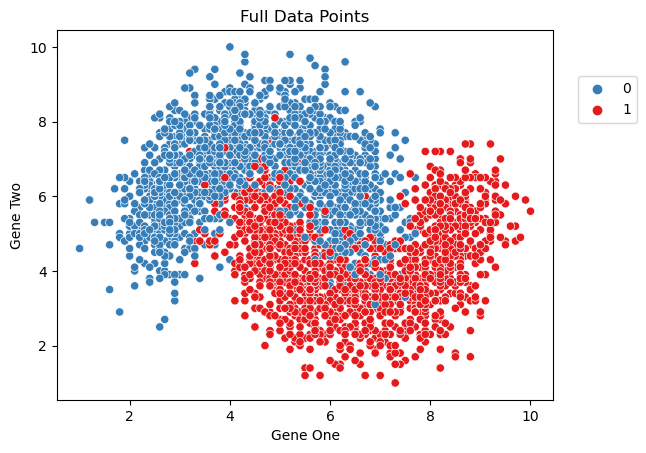

In [10]:
custom_palette = sns.color_palette("Set1", df[df.columns[2]].nunique()+1)
color_dict = dict()
markers_dict = dict()
j = 0

for i in df[df.columns[2]].value_counts().index:
    color_dict[i] = custom_palette[j]
    markers_dict[i] = 'o'
    j = j + 1

color_dict['Test Point'] = custom_palette[2]
markers_dict['Test Point'] = 'X'

# print(color_dict)
# print(markers_dict)

sns.scatterplot(x = df[df.columns[0]],y = df[df.columns[1]],hue=df[df.columns[2]],palette=color_dict,style=df[df.columns[2]],markers=markers_dict)
plt.title('Full Data Points')
plt.legend(loc=(1.05,0.75))

## Determing the value of K

In [11]:
len(df)

3000

In [12]:
k = math.floor(math.sqrt(len(df)))

if k%2==0 :
    k = k + 1

print(k)

55


## Train Test split

In [13]:
train_percentage = 60
test_percentage = 100 - train_percentage

print('Train Percentage :',train_percentage)
print('Test Percentage :',test_percentage)

Train Percentage : 60
Test Percentage : 40


In [14]:
no_of_train_data = math.ceil((train_percentage * len(df)) / 100)
print('No of train data :',no_of_train_data)

no_of_test_data = len(df) - no_of_train_data
print('No of test data',no_of_test_data)

No of train data : 1800
No of test data 1200


In [15]:
df.head(no_of_train_data)

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
1795,2.9,7.3,0
1796,6.1,3.3,1
1797,6.5,8.0,0
1798,2.5,5.5,0


In [16]:
df_train = df.head(no_of_train_data)
df_train

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
1795,2.9,7.3,0
1796,6.1,3.3,1
1797,6.5,8.0,0
1798,2.5,5.5,0


In [17]:
df.tail(no_of_test_data)

,Gene One,Gene Two,Cancer Present
1800,8.1,3.4,1
1801,7.7,4.1,1
1802,5.1,4.5,1
1803,4.3,9.6,0
1804,7.7,5.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


In [18]:
df_test = df.tail(no_of_test_data)
df_test

,Gene One,Gene Two,Cancer Present
1800,8.1,3.4,1
1801,7.7,4.1,1
1802,5.1,4.5,1
1803,4.3,9.6,0
1804,7.7,5.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


In [19]:
df_test = df_test.reset_index()
df_test

,index,Gene One,Gene Two,Cancer Present
0,1800,8.1,3.4,1
1,1801,7.7,4.1,1
2,1802,5.1,4.5,1
3,1803,4.3,9.6,0
4,1804,7.7,5.4,1
...,...,...,...,...
1195,2995,5.0,6.5,1
1196,2996,3.4,6.6,0
1197,2997,2.7,6.5,0
1198,2998,3.3,5.6,0


In [20]:
df_test = df_test.drop('index',axis=1)
df_test

,Gene One,Gene Two,Cancer Present
0,8.1,3.4,1
1,7.7,4.1,1
2,5.1,4.5,1
3,4.3,9.6,0
4,7.7,5.4,1
...,...,...,...
1195,5.0,6.5,1
1196,3.4,6.6,0
1197,2.7,6.5,0
1198,3.3,5.6,0


In [21]:
df_temp = df.copy()
df_temp

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


In [22]:
df_temp['Cancer Present'][no_of_train_data:] = ['Test Point'] * no_of_test_data
df_temp

C:\Users\HP\AppData\Local\Temp\ipykernel_4124\2074753982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Cancer Present'][no_of_train_data:] = ['Test Point'] * no_of_test_data


,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,Test Point
2996,3.4,6.6,Test Point
2997,2.7,6.5,Test Point
2998,3.3,5.6,Test Point


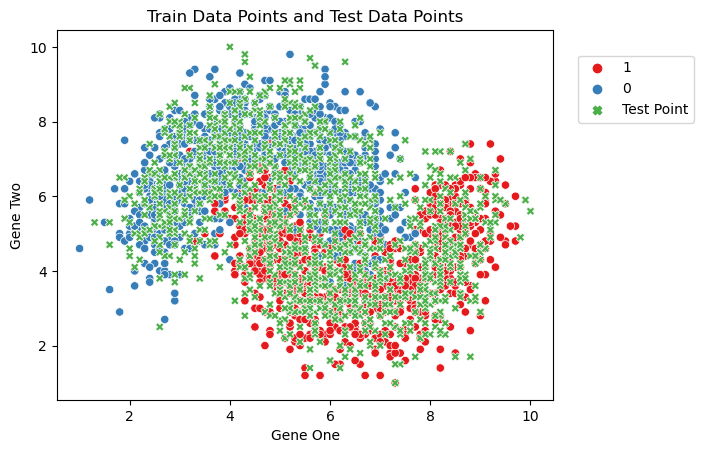

In [23]:
sns.scatterplot(x = df_temp[df_temp.columns[0]],y = df_temp[df_temp.columns[1]],hue=df_temp[df_temp.columns[2]],palette=color_dict,style=df_temp[df_temp.columns[2]],markers=markers_dict)
plt.title('Train Data Points and Test Data Points')
plt.legend(loc=(1.05,0.75))

# hue without palette : sns will provide default color for each group or class in df_temp['Cancer Present]
# huw with palette : sns will provide color we want for each group or class in df_temp['Cancer Present]
# style without markers : sns will provide default shape for each group or class in df_temp['Cancer Present]
# style with markers : sns will provide shape we want for each group or class in df_temp['Cancer Present]


## Calculating Euclean Distance from Test point to Train point , sorting it ascending order and then finding the nearest neighbor

In [24]:
df_train

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
1795,2.9,7.3,0
1796,6.1,3.3,1
1797,6.5,8.0,0
1798,2.5,5.5,0


In [25]:
df_test

,Gene One,Gene Two,Cancer Present
0,8.1,3.4,1
1,7.7,4.1,1
2,5.1,4.5,1
3,4.3,9.6,0
4,7.7,5.4,1
...,...,...,...
1195,5.0,6.5,1
1196,3.4,6.6,0
1197,2.7,6.5,0
1198,3.3,5.6,0


In [26]:
df_test.iloc[0]

Gene One          8.1
Gene Two          3.4
Cancer Present    1.0
Name: 0, dtype: float64

In [27]:
df_train.iloc[0][0]

4.3

In [28]:
df_train[df.columns[n-1]][0]

1

In [29]:
df_train.columns

Index(['Gene One', 'Gene Two', 'Cancer Present'], dtype='object')

In [30]:
# distance_list = list()
# class_name_list = list()
# total_distance = 0

# # calculating euclidean distance from test data to train data

# for i in range(len(df_test)):
#     for j in range(len(df_train)):
#         for c in range(n-1):
#             distance = (df_test.iloc[i][c] - df_train.iloc[j][c])**2
#             total_distance = total_distance + distance
#         total_distance = math.sqrt(total_distance)
#         distance_list.append((df_train[df_train.columns[n-1]][j],total_distance))
#         total_distance = 0
    
    
#     # sorting all those distances

#     for ii in range(len(distance_list)):
#         for jj in range(ii+1,len(distance_list)):
#             if distance_list[jj][1] < distance_list[ii][1]:
#                 temp = distance_list[ii]
#                 distance_list[ii] = distance_list[jj]
#                 distance_list[jj] = temp
    

#     # selecting first 'k' points and then counting the number of classes
    
#     count = dict()
#     for ii in range(k):
#         if distance_list[ii][0] not in count:
#             count[distance_list[ii][0]] = 1
#         else:
#             count[distance_list[ii][0]] = count[distance_list[ii][0]] + 1
    
    
#     # finding out the most nearest class

#     min = 0
#     for ii in count:
#         if count[ii] > min:
#             class_name = ii
#             min = count[ii]
    
#     class_name_list.append(class_name)
#     distance_list = list()

# print(class_name_list)

This code takes a lot of time for giving the output since we are using nested loop here and also used bubble sort inside
the first loop which consumed too much time. and then again we had to select first k points with smallest distance using one loop and
find number of classes with another loop.

so too much use of loop made this code too much slower.

So here i have optimized this code with eliminating the bubble sort.

here , after i got the distance list , i only took the first k points with smallest distance without sorting them and everytime i took
k(i) smallest point , i counted the class number, the point belongs to ,  too in dicitonary.after that I just found the most nearest neghbor

In [31]:
class_name_list = list()

# calculating euclidean distance from test data to train data

for i in range(len(df_test)):
    distance_list = list()
    for j in range(len(df_train)):
        distance = np.linalg.norm(df_test.iloc[i]-df_train.iloc[j])
        distance_list.append((df_train[df_train.columns[n-1]][j],distance))
    # print(distance_list)
    

    
    # selecting first 'k' points with smallest distance without sorting and then counting the number of classes

    minimum = None
    checked = dict()
    count = dict()
    min_list = list()

    for ii in range(k):
        for jj in range(len(distance_list)):
            if jj not in checked :
                if minimum is None :
                    minimum = distance_list[jj]
                elif distance_list[jj][1] < minimum[1]:
                    minimum = distance_list[jj]
                    index = jj
        min_list.append(minimum)
        if minimum[0] not in count:
            count[minimum[0]] = 1
        else:
            count[minimum[0]] = count[minimum[0]] + 1
        checked[index] = 1
        minimum = None

    # print(min_list)
    # print(count)

    # finding out the most nearest class
    
    min = 0
    for ii in count:
        if count[ii] > min:
            class_name = ii
            min = count[ii]
    class_name_list.append(class_name)
print(class_name_list)

[1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 

In [32]:
print(len(class_name_list))

1200


In [33]:
df_temp2 = df.copy()
df_temp2

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


In [34]:
df_temp2[df_temp2.columns[n-1]][no_of_train_data:] = class_name_list
df_temp2

C:\Users\HP\AppData\Local\Temp\ipykernel_4124\2165292902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp2[df_temp2.columns[n-1]][no_of_train_data:] = class_name_list


,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


In [35]:
color_dict

{1: (0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 0: (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 'Test Point': (0.30196078431372547, 0.6862745098039216, 0.2901960784313726)}

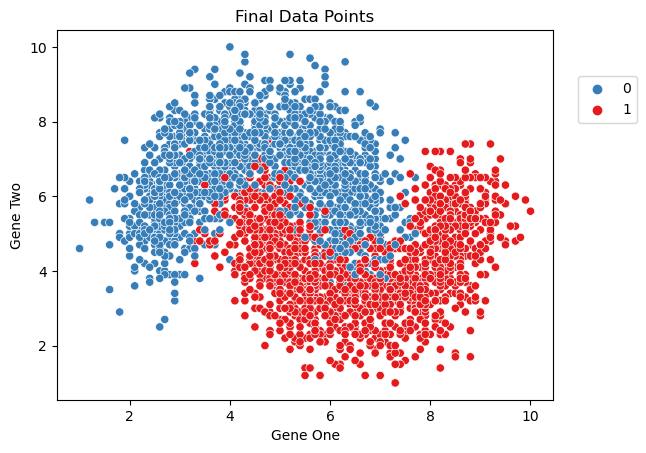

In [36]:
sns.scatterplot(x = df_temp2[df_temp2.columns[0]],y = df_temp2[df_temp2.columns[1]],hue=df_temp2[df_temp2.columns[2]],palette=color_dict,style=df_temp2[df_temp2.columns[2]],markers=markers_dict)
plt.title('Final Data Points')
plt.legend(loc=(1.05,0.75))

Text(0.5, 1.0, 'Final Data Points')

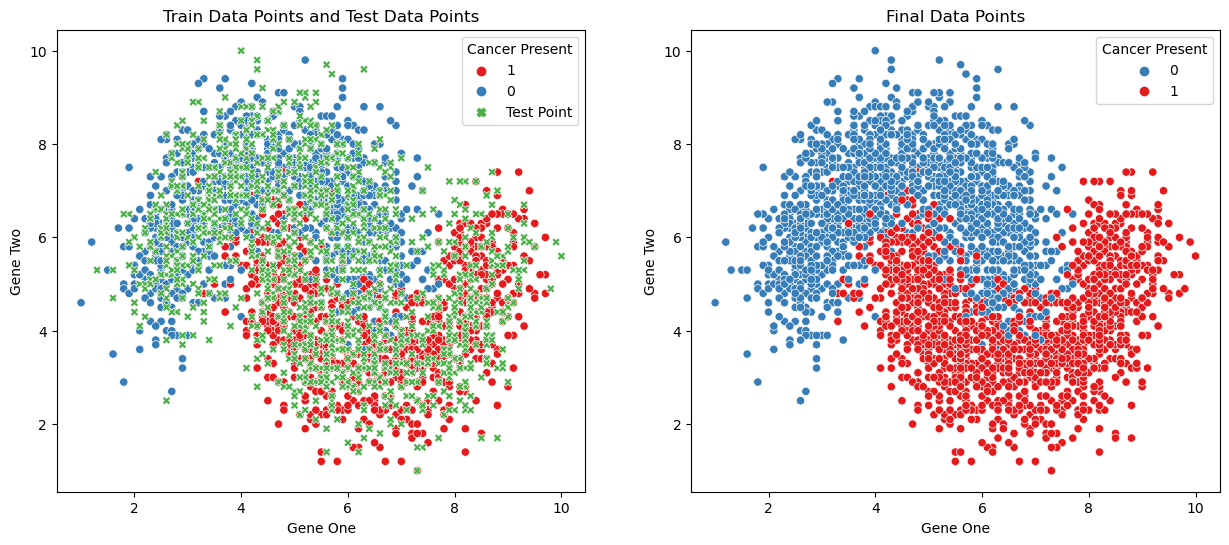

In [37]:
plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1) # row 1, col 2 index 1

sns.scatterplot(x = df_temp[df_temp.columns[0]],y = df_temp[df_temp.columns[1]],hue=df_temp[df_temp.columns[2]],palette=color_dict,style=df_temp[df_temp.columns[2]],markers=markers_dict)
plt.title('Train Data Points and Test Data Points')

# hue without palette : sns will provide default color for each group or class in df_temp['Cancer Present]
# huw with palette : sns will provide color we want for each group or class in df_temp['Cancer Present]
# style without markers : sns will provide default shape for each group or class in df_temp['Cancer Present]
# style with markers : sns will provide shape we want for each group or class in df_temp['Cancer Present]





plt.subplot(1, 2, 2) # index 2


sns.scatterplot(x = df_temp2[df_temp2.columns[0]],y = df_temp2[df_temp2.columns[1]],hue=df_temp2[df_temp2.columns[2]],palette=color_dict,style=df_temp2[df_temp2.columns[2]],markers=markers_dict)
plt.title('Final Data Points')

In [41]:
right = 0
wrong = 0

for i in range(len(class_name_list)):
    if class_name_list[i] == df_test[df_test.columns[n-1]][i]:
        right = right + 1
    else:
        wrong = wrong + 1

print(len(df_test))
print(right,wrong)

1200
1189 11


In [39]:
accuarcy = (right * 100) / len(class_name_list)
print(accuarcy)

99.08333333333333


In [40]:
from sklearn.metrics import accuracy_score

accuracy_score(df_test[df_test.columns[n-1]],class_name_list) * 100

99.08333333333333